# Логарифмическое блуждание

Логарифмическое блуждание определяется уравнением:

$ {dx}= \alpha{x}{dt} + \beta{x}\delta{W} $

Часто эту модель называют геометрическим или экспоненциальным броуновским блужданием.
Подобная зависимость возникает во многих физических, биологических и социальных системах, от радиоактивного распада до роста экономики.


Мы не можем разделить уравнение на $x$ тем самым внести его под дифференциал. Для этого необходимо выполнить замену, согласно Лемме Ито, получим следующую систему:

$ {d(ln x)}= (\alpha - {\frac {\beta^2}{2}}){dt} + \beta\delta{W} $

Решение этого уравнения:

$ x(t)= \exp^{(\alpha - {\frac {\beta^2}{2}}){t} + \beta\delta{W}} $


In [2]:
from scipy.integrate import odeint
import pylab as plt
import numpy as np
import random
import math

def get_f(a=0, b=0, w=None):
    
    def f(t):
        
        return math.e**((a - b**2/2)*t + b*w(t))
    
    return f

In [58]:
def get_w():
    
    dw = {}
    
    def w(t):
        if t in dw:
            return dw[t]
        else:
            nw = random.randint(0, 1000) / 10000
            dw[t] = nw
            return nw
        
    return w

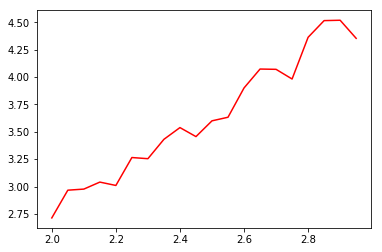

In [44]:
t = [2+0.05*i for i in range(20)]
w = get_w()
f = get_f(a=0.5, b=0.1, w=w)
x = [f(i) for i in t]

plt.plot(t, x, 'r')
plt.show()

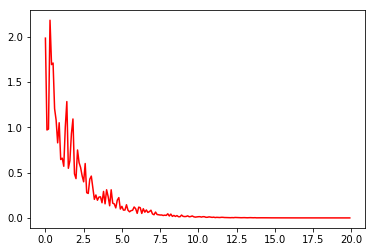

In [30]:
t = [0.1*i for i in range(200)]
w = get_w()
f = get_f(a=0, b=1, w=w)
x = [f(i) for i in t]

plt.plot(t, x, 'r')
plt.show()

$ d{x} = (-{x}{y} + \omega^2{x} - 2\lambda{x}^2)dt + x{s_x}\delta{W}$

$ d{y} = ({x}{y} - y)dt + y{s_y}\delta{W}$

$ d(ln{x}) = ((-y + \omega^2 - 4\lambda{x}) - 4)d{t} + s_x\delta{W}$

$ d(ln{y}) = (x - 1)d{t} + s_y\delta{W}$

$ x = \exp ^ {(-y + \omega^2 - 4\lambda{x} - 4)t + s_x\delta{W}} $

$ y = \exp ^ {(x - 1)t + s_y\delta{W}}$

In [224]:
def get_f(omega=0, lambd=0, sx=0.007, sy=0, w=None):
    
    def f(xy, t):
        x, y = xy
        
        return [(-y+omega**2 - 4*lambd*x-4) * t + sx*w(t),
                (x-1) * t + sy*w(t)]
    
    return f

/home/zaber/.local/lib/python3.5/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


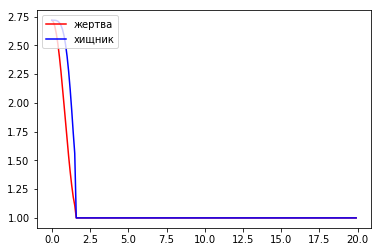

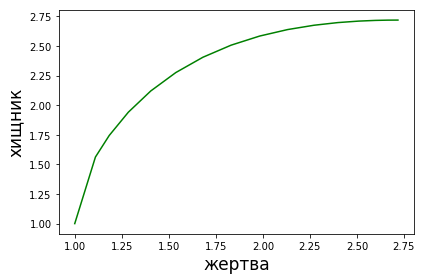

omega: 2, lambda: 0.001, sx: 0.01, sy: 0, step: 0.1


In [249]:
step = 0.1
omega = 2
lambd = 0.001
sx = 0.01
sy = 0

t = [step*i for i in range(200)]
w = get_w()
f = get_f(omega=omega, lambd=lambd, sx=sx, sy=sy, w=w)

xy0 = [1, 1]
    
dxy = odeint(f, xy0, t)

x = [math.exp(i[0]) for i in dxy]
y = [math.exp(i[1]) for i in dxy]

plt.plot(t, x, 'r')
plt.plot(t, y, 'b')
plt.legend(["жертва", "хищник"], loc=2)
plt.show()

plt.plot(x, y, 'g')
plt.xlabel('жертва', fontsize=17)
plt.ylabel('хищник', fontsize=17)
plt.tight_layout()
plt.show()
print('omega: {}, lambda: {}, sx: {}, sy: {}, step: {}'.format(omega, lambd, sx, sy, step))

In [194]:
max([i[0] for i in dxy])

9.6404327785232766

In [ ]:
    def f(t):    
        
        return [math.exp**((-y+omega**2 - 4*lambd*x-4) * t + sx*w(t)),
                math.exp**((x-1) * t + sy*w(t))]